In [1]:
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
mint=pd.read_csv('MINTDEF.csv',index_col=0, header=0)
#All retweets are automatically removed by twint. CHECK
mint=mint[mint.retweet==False]
#All bots are automatically removed by twint
mint.head()

,user_id,username,date,tweet,retweet,hashtags,nlikes,nretweets,language,Company
0,279236166,EJLizama,2021-06-01 01:42:08,"@VancityReynolds So, after our first six month...",False,[],0,0,en,Mint Mobile
1,71210959,kodie,2021-06-01 00:09:59,Cheap plans $15/month &amp; Save $15 @MintMobi...,False,"['mint', 'mobile', 'cell', 'wireless', 'deal',...",0,0,en,Mint Mobile
2,15999396,AndBabyMakes5,2021-05-31 23:58:02,Hey @VancityReynolds your commercial asks how ...,False,[],0,0,en,Mint Mobile
3,173978383,deeprastogi,2021-05-31 23:44:05,If there weren't enough reasons to love @Mint...,False,[],1,0,en,Mint Mobile
4,1205668050827018241,RandalGilbert11,2021-05-31 23:15:48,@fmossthree @AviationGin @VancityReynolds Fini...,False,[],0,0,en,Mint Mobile


In [2]:
xfin=pd.read_csv('XfinityDEFF.csv',index_col=0, header=0)
#All retweets are automatically removed by twint. CHECK
xfin=xfin[xfin.retweet==False]
#All bots are automatically removed by twint
xfin.head()


,user_id,username,date,tweet,retweet,hashtags,nlikes,nretweets,language,Company
0,1037178407509868545,2018Colo,2021-06-01 00:47:40,@xfinitymobile I only have 2 lines and am a cu...,False,[],0,0,en,Xfinity
1,45651493,leeeeeeeesssa33,2021-05-31 23:25:57,@bobbyfoo7 @xfinitymobile I HATE that ad. I se...,False,[],0,0,en,Xfinity
2,1031633746347274241,AnaRoseMusic,2021-05-31 17:37:49,I won’t believe corporations are people until ...,False,[],4,1,en,Xfinity
3,1031633746347274241,AnaRoseMusic,2021-05-31 17:12:31,@fantasticmstfox @xfinitymobile Yup. I couldn’...,False,[],1,0,en,Xfinity
4,1115623432090087425,fantasticmstfox,2021-05-31 17:11:35,@AnaRoseMusic @xfinitymobile Well I hate THAT ...,False,[],1,0,en,Xfinity


In [3]:
#Merged both companies
data=pd.concat([mint,xfin])
data.head()

,user_id,username,date,tweet,retweet,hashtags,nlikes,nretweets,language,Company
0,279236166,EJLizama,2021-06-01 01:42:08,"@VancityReynolds So, after our first six month...",False,[],0,0,en,Mint Mobile
1,71210959,kodie,2021-06-01 00:09:59,Cheap plans $15/month &amp; Save $15 @MintMobi...,False,"['mint', 'mobile', 'cell', 'wireless', 'deal',...",0,0,en,Mint Mobile
2,15999396,AndBabyMakes5,2021-05-31 23:58:02,Hey @VancityReynolds your commercial asks how ...,False,[],0,0,en,Mint Mobile
3,173978383,deeprastogi,2021-05-31 23:44:05,If there weren't enough reasons to love @Mint...,False,[],1,0,en,Mint Mobile
4,1205668050827018241,RandalGilbert11,2021-05-31 23:15:48,@fmossthree @AviationGin @VancityReynolds Fini...,False,[],0,0,en,Mint Mobile


Mint Mobile:

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
texts=list(mint['tweet'])
processed_texts = [text for text in nlp.pipe(texts, disable=["ner", "parser"])]
tokenized_texts = [[token.lemma_ for token in text if not token.is_punct and not token.is_stop] for text in processed_texts]
#print(tokenized_texts)


In [5]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(tokenized_texts)

# Create Corpus
texts = tokenized_texts

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1)]


In [6]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=20,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [7]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.4784406749025

Coherence Score:  0.36579689132888304


In [8]:
#Build second model for check up
from gensim.models.wrappers import LdaMallet
import os
os.environ['MALLET_HOME'] = 'C:\\Users\\Wehel\\Downloads\\thesis\\mallet-2.0.8'

mallet_path = 'C:\\Users\\Wehel\\Downloads\\thesis\\mallet-2.0.8\\bin\\mallet'



#mallet_path = r'C:\Users\Wehel\Downloads\thesis\mallet-2.0.8' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path,corpus=corpus, num_topics=10, id2word=id2word)

In [9]:
# Compute Coherence Score 
coherence_model_lda = CoherenceModel(model=ldamallet, texts=tokenized_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('We see an increase of the coherence score')


Coherence Score:  0.4902050835738184
We see an increase of the coherence score


In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=20, step=6)

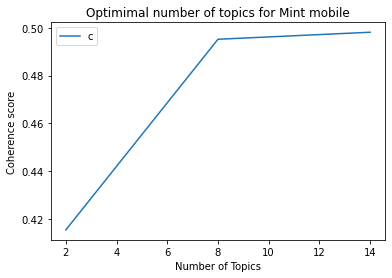

In [12]:
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Optimimal number of topics for Mint mobile')
plt.show()


In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Topic number =", m, " has Coherence Value of", round(cv, 4))

Topic number = 2  has Coherence Value of 0.4153
Topic number = 8  has Coherence Value of 0.4953
Topic number = 14  has Coherence Value of 0.4982


In [14]:
print('Cut of point is at 8 topics')

Cut of point is at 8 topics


Xfinity mobile:

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")
texts=list(xfin['tweet'])
processed_texts = [text for text in nlp.pipe(texts, disable=["ner", "parser"])]
tokenized_texts1 = [[token.lemma_ for token in text if not token.is_punct and not token.is_stop] for text in processed_texts]
#print(tokenized_texts1)

In [16]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(tokenized_texts1)

# Create Corpus
texts1 = tokenized_texts1

# Term Document Frequency
corpus1 = [id2word.doc2bow(text) for text in texts1]

#corpus=filter(lambda x: x in dictionary.values(), t) for t in texts)
# View
print(corpus1[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [17]:
#Build LDA model
from gensim.models.wrappers import LdaMallet
import os
os.environ['MALLET_HOME'] = 'C:\\Users\\Wehel\\Downloads\\thesis\\mallet-2.0.8'

mallet_path = 'C:\\Users\\Wehel\\Downloads\\thesis\\mallet-2.0.8\\bin\\mallet'



#mallet_path = r'C:\Users\Wehel\Downloads\thesis\mallet-2.0.8' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path,corpus=corpus1, num_topics=10, id2word=id2word)

In [18]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=ldamallet, texts=texts1, dictionary=id2word, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Perplexity:  -9.47844067065

Coherence Score:  0.5139099605932509


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values1 = []
    model_list1 = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus1, num_topics=num_topics, id2word=id2word)
        model_list1.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts1, dictionary=dictionary, coherence='c_v')
        coherence_values1.append(coherencemodel.get_coherence())

    return model_list1, coherence_values1

In [24]:
model_list1, coherence_values1 = compute_coherence_values(dictionary=id2word, corpus=corpus1, texts=texts1, start=2, limit=20, step=6)

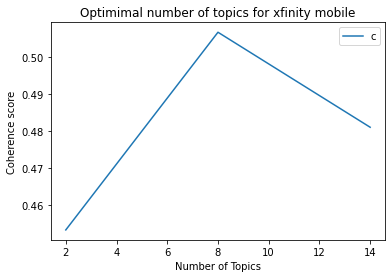

In [25]:
limit=20; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values1)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Optimimal number of topics for xfinity mobile')
plt.show()

In [28]:
# Print the coherence scores
for m, cv in zip(x, coherence_values1):
    print("Topic number =", m, " has Coherence Value of", round(cv, 4))

Topic number = 2  has Coherence Value of 0.4532
Topic number = 8  has Coherence Value of 0.5066
Topic number = 14  has Coherence Value of 0.4809


In [29]:
print('Cut of point is at 8 topics')

Cut of point is at 8 topics
